In [1]:
from Simulation import Simulation
from modules.Particle import Particle
from modules.Propagation import Propagation
from modules.Source import Source
import numpy as np

## Simulation of Random Walk Propagation

Initialize the simulation by calling Simulation(). The class instance simulation contains all information relevant for the complete simulation.

In [2]:
simulation = Simulation()

### source
gyro_radius = 30.0
diffusion_tensor = np.array([10.0, 10.0, 10.0], dtype=np.float32)
source_position = np.zeros(3, dtype=np.float32)
nr_particles = 500
source = Source(nr_particles, source_position, gyro_radius, diffusion_tensor)
simulation.add_particles(source)

### propagation
step_size = 1.0
propagation = Propagation(step_size)
steps = 10**5
t_max = 10**5
time = np.linspace(1, t_max, steps, dtype=np.float32)
simulation.add_propagation(propagation, time)

### observer sphere
observer_type = 1

### run simulation
data = simulation.run_simulation(observer_type)

init simulation completed


## Analizing Simulation Data

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(data).T
df.columns = ['id', 't', 'x', 'y', 'z']
df

,id,t,x,y,z
0,726.0,301.0,173.781799,173.781799,173.781799
1,1236.0,301.0,173.781799,-173.781799,-173.781799
2,1445.0,301.0,173.781799,-173.781799,173.781799
3,2699.0,301.0,173.781799,173.781799,173.781799
4,2723.0,301.0,-173.781799,-173.781799,-173.781799
...,...,...,...,...,...
314346,2683.0,99997.0,-176.091232,176.091232,168.008377
314347,4107.0,99997.0,173.781784,173.781784,173.781784
314348,1161.0,99998.0,-183.596664,183.596664,151.265244
314349,3077.0,99998.0,-173.204437,-173.204437,-174.359131


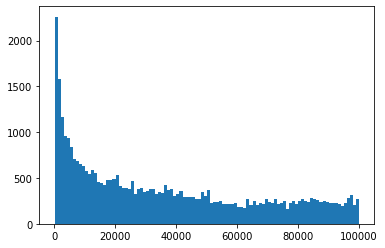

In [11]:
plt.hist(data[1], bins=100)
plt.show()